In [1]:
import os
import json 
import csv
import numpy as np
import pandas as pd 
import random
import math
import collections
import seaborn as sns
import networkx as nx
import geopandas as gpd


from matplotlib import pyplot as plt

In [42]:
df = pd.read_csv("../data_collection/data/tuscany.csv",index_col=0)
df.head()

,position,name,city,menu,link,score,N_reviews,price,Name,Province,...,travellersChoice,latitude,longitude,cuisines,meals,specialDiets,positionlink,province,Link,provinceOK
0,2018,Osteria al Borgo,Lucca,False,/Restaurant_Review-g187898-d23137800-Reviews-O...,5.0,6,NaN,Osteria al Borgo,lucca,...,False,43.851350,10.506207,"Pizza, Tuscan, Central-Italian",NaN,"Vegetarian Friendly, Vegan Options, Gluten Fre...",j39_https://maps.google.com/maps?saddr=&daddr=...,pisa,/Restaurant_Review-g187898-d23137800-Reviews-O...,0
1,551,Acino Bianco,Marina di Massa,False,/Restaurant_Review-g194814-d12843022-Reviews-A...,4.5,92,2.5,Acino Bianco,massacarrara,...,True,44.004616,10.115488,Italian,Dinner,"Vegetarian Friendly, Gluten Free Options",yEU_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g194814-d12843022-Reviews-A...,0
2,308,El Artista Ristorante Argentino,Massa,False,/Restaurant_Review-g660766-d17543924-Reviews-E...,4.5,78,2.5,El Artista Ristorante Argentino,massacarrara,...,False,44.041000,10.124396,"Barbecue, Argentinean, Steakhouse","Dinner, Lunch",NaN,U0P_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g660766-d17543924-Reviews-E...,0
3,1285,La Locanda di Bivigliano,Bivigliano,False,/Restaurant_Review-g1957776-d13948598-Reviews-...,NaN,28,NaN,La Locanda di Bivigliano,florence,...,False,43.896214,11.321173,"Italian, Mediterranean, Barbecue, Tuscan, Cent...",NaN,Vegetarian Friendly,rg1_https://maps.google.com/maps?saddr=&daddr=...,prato,/Restaurant_Review-g1957776-d13948598-Reviews-...,0
4,1499,Beach Bar @PuntAla,Punta Ala,False,/Restaurant_Review-g194871-d19315573-Reviews-B...,2.5,2,1.0,Beach Bar @PuntAla,grosseto,...,False,42.841410,10.775602,"Italian, Mediterranean","Lunch, Brunch, Drinks",NaN,32Q_https://maps.google.com/maps?saddr=&daddr=...,grosseto,/Restaurant_Review-g194871-d19315573-Reviews-B...,1


In [43]:
df.isnull().sum()

position               0
name                   0
city                   2
menu                   0
link                   0
score                545
N_reviews              0
price               3041
Name                   0
Province               0
City                   0
claimed                0
covidMeasure           0
travellersChoice       0
latitude             118
longitude            118
cuisines            1411
meals               6664
specialDiets        8762
positionlink           4
province               0
Link                1839
provinceOK             0
dtype: int64

<AxesSubplot:>

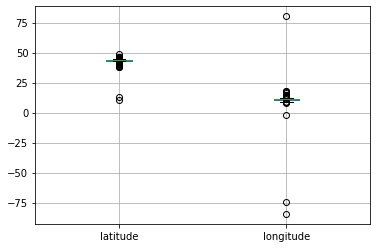

In [44]:
df.boxplot(column=['latitude','longitude'])



In [45]:
for i in  df[(df.latitude.isna()) | (df.latitude<42) | (df.latitude>44.55)].index:
    prov = df.loc[i,'city']
    df.loc[i,'latitude'] = np.mean(df.loc[(~df.latitude.isna()) & (df.latitude>25)&(df.city == prov),'latitude'])

In [46]:
for i in  df[(df.longitude.isna()) | (df.longitude<9.7) | (df.longitude>12.43)].index:
    prov = df.loc[i,'city']
    df.loc[i,'longitude'] = np.mean(df.loc[(~df.longitude.isna()) & (df.longitude<25)&(df.longitude>0)&(df.city == prov),'longitude'])

<AxesSubplot:>

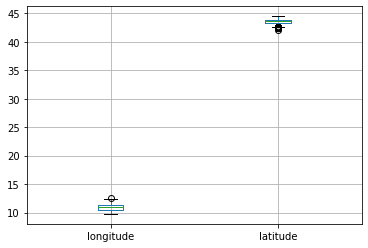

In [47]:
df.boxplot(column=['longitude','latitude'])



<AxesSubplot:xlabel='longitude', ylabel='latitude'>

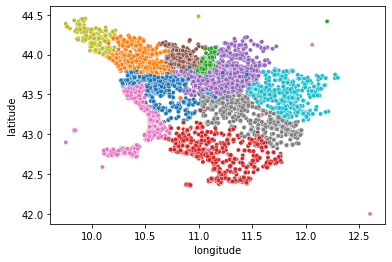

In [48]:
sns.scatterplot(data=df,x='longitude',y='latitude',hue='province',size = 'N_reviews',legend=None)

# Clean province by province

pisa


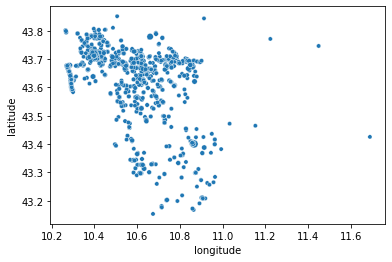

lucca


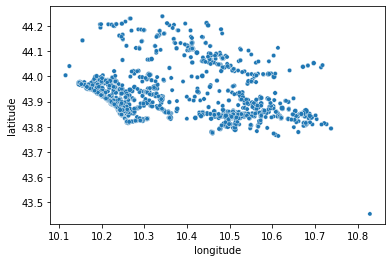

prato


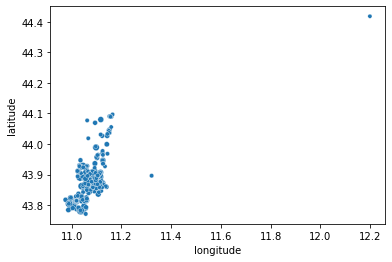

grosseto


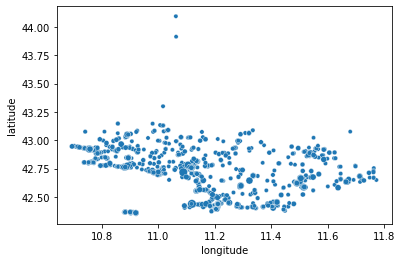

florence


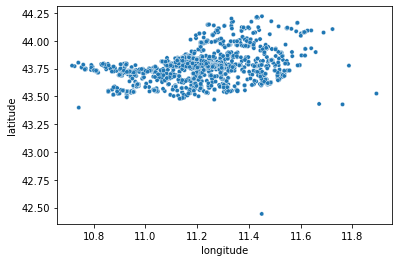

pistoia


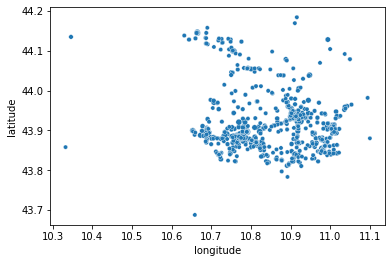

livorno


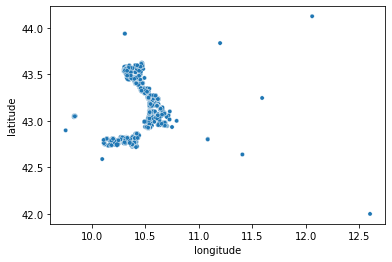

siena


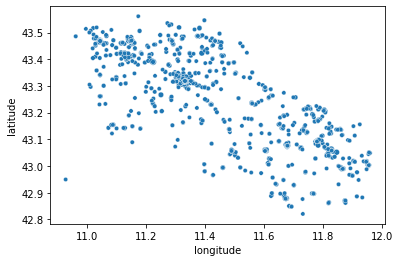

massacarrara


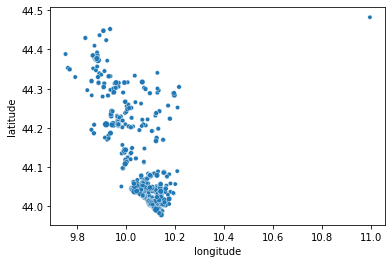

arezzo


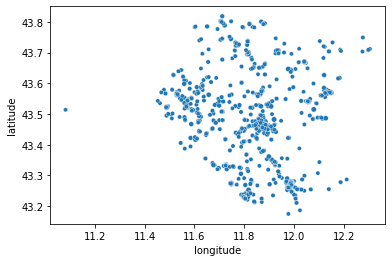

In [50]:
for i, p in enumerate(df.province.unique()):
    print(p)
    sns.scatterplot(data=df[df.province==p],x='longitude',y='latitude',size = 'N_reviews',legend=None)
    plt.show()

In [51]:
#PISA
for i in  df[(df.province == 'pisa')&((df.longitude>10.5) | ((df.latitude>43.8 )&(df.longitude>10.8)))].index:
    prov = df.loc[i,'city']
    df.loc[i,'latitude'] = np.mean(df.loc[(~df.latitude.isna()) & (df.latitude>25)&(df.city == prov),'latitude'])
    df.loc[i,'longitud§e'] = np.mean(df.loc[(~df.longitude.isna()) & (df.longitude<25)&(df.longitude>0)&(df.city == prov),'longitude'])
        

In [52]:
#LUCCA
for i in  df[(df.province == 'lucca')&(df.latitude<43.6)].index:
    prov = df.loc[i,'city']
    df.loc[i,'latitude'] = np.mean(df.loc[(~df.latitude.isna()) & (df.latitude>25)&(df.city == prov),'latitude'])
    df.loc[i,'longitude'] = np.mean(df.loc[(~df.longitude.isna()) & (df.longitude<25)&(df.longitude>0)&(df.city == prov),'longitude'])
        

In [53]:
#PRATO
for i in  df[(df.province == 'prato')&(df.longitude>11.3)].index:
    prov = df.loc[i,'city']
    df.loc[i,'latitude'] = np.mean(df.loc[(~df.latitude.isna()) & (df.latitude>25)&(df.city == prov),'latitude'])
    df.loc[i,'longitude'] = np.mean(df.loc[(~df.longitude.isna()) & (df.longitude<25)&(df.longitude>0)&(df.city == prov),'longitude'])
        


In [54]:
#GROSSETO
for i in  df[(df.province == 'grosseto')&(df.latitude>43.5)].index:
    prov = df.loc[i,'city']
    df.loc[i,'latitude'] = np.mean(df.loc[(~df.latitude.isna()) & (df.latitude>25)&(df.city == prov),'latitude'])
    df.loc[i,'longitude'] = np.mean(df.loc[(~df.longitude.isna()) & (df.longitude<25)&(df.longitude>0)&(df.city == prov),'longitude'])
        


In [55]:
#FLORENCE
for i in  df[(df.province == 'florence')&((df.latitude<43.5)|(df.longitude>11.75))].index:
    prov = df.loc[i,'city']
    df.loc[i,'latitude'] = np.mean(df.loc[(~df.latitude.isna()) & (df.latitude>25)&(df.city == prov),'latitude'])
    df.loc[i,'longitude'] = np.mean(df.loc[(~df.longitude.isna()) & (df.longitude<25)&(df.longitude>0)&(df.city == prov),'longitude'])
        


In [56]:
#PISTOIA
for i in  df[(df.province == 'pistoia')&((df.latitude<43.75)|(df.longitude<10.5))].index:
    prov = df.loc[i,'city']
    df.loc[i,'latitude'] = np.mean(df.loc[(~df.latitude.isna()) & (df.latitude>25)&(df.city == prov),'latitude'])
    df.loc[i,'longitude'] = np.mean(df.loc[(~df.longitude.isna()) & (df.longitude<25)&(df.longitude>0)&(df.city == prov),'longitude'])
        

In [57]:
#LIVORNO
for i in  df[(df.province == 'livorno')&((df.latitude>43.7)|(df.longitude>11))].index:
    prov = df.loc[i,'city']
    df.loc[i,'latitude'] = np.mean(df.loc[(~df.latitude.isna()) & (df.latitude>25)&(df.city == prov),'latitude'])
    df.loc[i,'longitude'] = np.mean(df.loc[(~df.longitude.isna()) & (df.longitude<25)&(df.longitude>0)&(df.city == prov),'longitude'])
        

In [58]:
#SIENA
for i in  df[(df.province == 'pistoia')&((df.latitude>43.7)|(df.longitude>11))].index:
    prov = df.loc[i,'city']
    df.loc[i,'latitude'] = np.mean(df.loc[(~df.latitude.isna()) & (df.latitude>25)&(df.city == prov),'latitude'])
    df.loc[i,'longitude'] = np.mean(df.loc[(~df.longitude.isna()) & (df.longitude<25)&(df.longitude>0)&(df.city == prov),'longitude'])
        

In [59]:
#MASSACARRARA
for i in  df[(df.province == 'massacarrara')&(df.longitude>10.4)].index:
    prov = df.loc[i,'city']
    df.loc[i,'latitude'] = np.mean(df.loc[(~df.latitude.isna()) & (df.latitude>25)&(df.city == prov),'latitude'])
    df.loc[i,'longitude'] = np.mean(df.loc[(~df.longitude.isna()) & (df.longitude<25)&(df.longitude>0)&(df.city == prov),'longitude'])
        

In [60]:
#AREZZO
for i in  df[(df.province == 'arezzo')&(df.longitude<11.2)].index:
    prov = df.loc[i,'city']
    df.loc[i,'latitude'] = np.mean(df.loc[(~df.latitude.isna()) & (df.latitude>25)&(df.city == prov),'latitude'])
    df.loc[i,'longitude'] = np.mean(df.loc[(~df.longitude.isna()) & (df.longitude<25)&(df.longitude>0)&(df.city == prov),'longitude'])
        

In [33]:
for i in  df[((df.latitude>44.4 )&(df.longitude>10.5)) | ((df.latitude>44 )&(df.longitude>12))].index:
    prov = df.loc[i,'city']
    df.loc[i,'latitude'] = np.mean(df.loc[(~df.latitude.isna()) & (df.latitude>25)&(df.city == prov),'latitude'])
    df.loc[i,'longitude'] = np.mean(df.loc[(~df.longitude.isna()) & (df.longitude<25)&(df.longitude>0)&(df.city == prov),'longitude'])
        

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

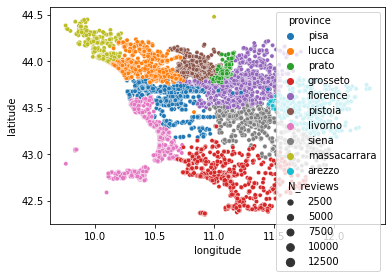

In [66]:
sns.scatterplot(data=df,x='longitude',y='latitude',hue='province',size = 'N_reviews')

In [ ]:
df.to_csv()

In [ ]:
sns.scatterplot(data=df,x='longitude',y='latitude',hue='province',size = 'N_reviews',legend=None)